In [8]:
%pip install xgboost



Note: you may need to restart the kernel to use updated packages.


In [10]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../Data/Hotels_Best_Discount.csv")
X = df[["Snapshot Date", "Checkin Date" , "DayDiff" , "WeekDay" , "Hotel_Encoded_Name"]]
y = df["Discount Code"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Adjust class labels to start from 0 (since XGBoost requires classes to start from 0)
y_train_adj = y_train - 1
y_test_adj = y_test - 1




**What is XGboost?**

XGBoost (eXtreme Gradient Boosting) is an optimized gradient boosting algorithm that builds multiple decision trees sequentially, where each tree corrects the mistakes of the previous ones. It uses a combination of boosting techniques and regularization to achieve high accuracy while preventing overfitting.
___
**XGboost Hyperparameter Overview:**
- n_estimators – Number of boosting rounds (trees).
- max_depth – Maximum depth of each tree (None = unlimited).
- learning_rate – Step size for updating weights.
- subsample – Fraction of training samples used per tree to reduce overfitting.
- colsample_bytree – Fraction of features used for each tree, controlling diversity.
- gamma – Minimum loss reduction required to split a node (higher = more conservative splits).















In [16]:
param_grid = {
    "n_estimators": [100],  # default=100
    "max_depth": [20, None],  # default=None
    "learning_rate": [0.1, 0.3],  # default=0.3
    "subsample": [0.8, 1.0],  # default=1.0
    "colsample_bytree": [0.8, 1.0],  # default=1.0
    "gamma": [0, 0.3],  # default=0
}

grid_search = GridSearchCV(
    xgb.XGBClassifier(objective="multi:softmax", num_class=4, use_label_encoder=False, eval_metric="mlogloss"),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True
)


grid_search.fit(X_train, y_train_adj)  # Use adjusted labels
results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]
worst_5_models = results_df.iloc[-5:][["mean_test_score", "params"]]


print("\nTop 5 XGBoost Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

print("\nWorst 5 XGBoost Models (based on validation accuracy):")
for idx, row in worst_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")


best_xgb = grid_search.best_estimator_
best_xgb_params = grid_search.best_params_

y_pred_adj = best_xgb.predict(X_test)  # Predictions are in [0,1,2,3]
y_pred = y_pred_adj + 1  # Shift back to [1,2,3,4]

test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best XGBoost Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_xgb_params)


c:\Users\alon1\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:07:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 5 XGBoost Models (based on validation accuracy):
Model 6: Accuracy=0.7595, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 20, 'n_estimators': 100, 'subsample': 1.0}
Model 2: Accuracy=0.7592, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100, 'subsample': 1.0}
Model 22: Accuracy=0.7580, Params={'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 20, 'n_estimators': 100, 'subsample': 1.0}
Model 1: Accuracy=0.7542, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100, 'subsample': 0.8}
Model 18: Accuracy=0.7540, Params={'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100, 'subsample': 1.0}

Worst 5 XGBoost Models (based on validation accuracy):
Model 28: Accuracy=0.5319, Params={'colsample_bytree': 1.0, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100, 'subsam

**Changes:**

- colsample_bytree: 0.8 only
- gamma: 0 only
- learning_rate: keep the same
- max_depth: will try 15 ,20 ,25
- subsample: 1 only

In [ ]:
param_grid = {
    "n_estimators": [100],  # default=100
    "max_depth": [15, 20, 25],  # default=None
    "learning_rate": [0.1, 0.3],  # default=0.3
    "subsample": [1.0],  # default=1.0
    "colsample_bytree": [0.8],  # default=1.0
    "gamma": [0],  # default=0
}

grid_search = GridSearchCV(
    xgb.XGBClassifier(objective="multi:softmax", num_class=4, use_label_encoder=False, eval_metric="mlogloss"),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True
)


grid_search.fit(X_train, y_train_adj)  # Use adjusted labels
results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]

print("\nTop 5 XGBoost Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")


best_xgb = grid_search.best_estimator_
best_xgb_params = grid_search.best_params_

y_pred_adj = best_xgb.predict(X_test)  # Predictions are in [0,1,2,3]
y_pred = y_pred_adj + 1  # Shift back to [1,2,3,4]

test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best XGBoost Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_xgb_params)


c:\Users\alon1\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:18:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 5 XGBoost Models (based on validation accuracy):
Model 3: Accuracy=0.7627, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}
Model 6: Accuracy=0.7606, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}
Model 5: Accuracy=0.7595, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 20, 'n_estimators': 100, 'subsample': 1.0}
Model 2: Accuracy=0.7592, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100, 'subsample': 1.0}
Model 4: Accuracy=0.7508, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 100, 'subsample': 1.0}

Test Accuracy of Best XGBoost Model: 0.8052

Best Hyperparameters Found:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}


**Changes:**

- n_estimators: we'll try  50, 100 ,300
- colsample_bytree: we'll try 0.8, 0.9, 1.0
- gamma: 0 only
- learning_rate: 0.1 only
- max_depth: 25 only
- subsample: 1 only

In [18]:
param_grid = {
    "n_estimators": [50, 100, 300],  # default=100
    "max_depth": [25],  # default=None
    "learning_rate": [0.1],  # default=0.3
    "subsample": [1.0],  # default=1.0
    "colsample_bytree": [0.8, 0.9, 1.0],  # default=1.0
    "gamma": [0],  # default=0
}

grid_search = GridSearchCV(
    xgb.XGBClassifier(objective="multi:softmax", num_class=4, use_label_encoder=False, eval_metric="mlogloss"),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True
)


grid_search.fit(X_train, y_train_adj)  # Use adjusted labels
results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]

print("\nTop 5 XGBoost Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")


best_xgb = grid_search.best_estimator_
best_xgb_params = grid_search.best_params_

y_pred_adj = best_xgb.predict(X_test)  # Predictions are in [0,1,2,3]
y_pred = y_pred_adj + 1  # Shift back to [1,2,3,4]

test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best XGBoost Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_xgb_params)


c:\Users\alon1\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:30:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 5 XGBoost Models (based on validation accuracy):
Model 2: Accuracy=0.7627, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}
Model 5: Accuracy=0.7627, Params={'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}
Model 3: Accuracy=0.7619, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 300, 'subsample': 1.0}
Model 6: Accuracy=0.7619, Params={'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 300, 'subsample': 1.0}
Model 1: Accuracy=0.7594, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 50, 'subsample': 1.0}

Test Accuracy of Best XGBoost Model: 0.8052

Best Hyperparameters Found:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}


**Changes:**

- n_estimators: we'll try  100 ,200
- colsample_bytree: we'll try 0.6, 0.8
- gamma: 0 only
- learning_rate: we'll try  0.1 , 0.05
- max_depth: 25 only
- subsample: 1 only

In [19]:
param_grid = {
    "n_estimators": [100, 200],  # default=100
    "max_depth": [25],  # default=None
    "learning_rate": [0.05, 0.1],  # default=0.3
    "subsample": [1.0],  # default=1.0
    "colsample_bytree": [0.6, 0.8],  # default=1.0
    "gamma": [0],  # default=0
}

grid_search = GridSearchCV(
    xgb.XGBClassifier(objective="multi:softmax", num_class=4, use_label_encoder=False, eval_metric="mlogloss"),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True
)


grid_search.fit(X_train, y_train_adj)  # Use adjusted labels
results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]

print("\nTop 5 XGBoost Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")


best_xgb = grid_search.best_estimator_
best_xgb_params = grid_search.best_params_

y_pred_adj = best_xgb.predict(X_test)  # Predictions are in [0,1,2,3]
y_pred = y_pred_adj + 1  # Shift back to [1,2,3,4]

test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best XGBoost Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_xgb_params)


c:\Users\alon1\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:43:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 5 XGBoost Models (based on validation accuracy):
Model 6: Accuracy=0.7627, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 200, 'subsample': 1.0}
Model 7: Accuracy=0.7627, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}
Model 8: Accuracy=0.7623, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 200, 'subsample': 1.0}
Model 5: Accuracy=0.7618, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}
Model 3: Accuracy=0.7307, Params={'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}

Test Accuracy of Best XGBoost Model: 0.8051

Best Hyperparameters Found:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 200, 'subsample': 1.0}


## Fine Tune The learning_rate ##

In [21]:
param_grid = {
    "n_estimators": [100],  # default=100
    "max_depth": [25],  # default=None
    "learning_rate": [0.01, 0.03, 0.05],  # default=0.3
    "subsample": [1.0],  # default=1.0
    "colsample_bytree": [0.8],  # default=1.0
    "gamma": [0],  # default=0
}

grid_search = GridSearchCV(
    xgb.XGBClassifier(objective="multi:softmax", num_class=4, use_label_encoder=False, eval_metric="mlogloss"),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True
)


grid_search.fit(X_train, y_train_adj)  # Use adjusted labels
results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]

print("\nTop 5 XGBoost Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")


best_xgb = grid_search.best_estimator_
best_xgb_params = grid_search.best_params_

y_pred_adj = best_xgb.predict(X_test)  # Predictions are in [0,1,2,3]
y_pred = y_pred_adj + 1  # Shift back to [1,2,3,4]

test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best XGBoost Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_xgb_params)


c:\Users\alon1\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 5 XGBoost Models (based on validation accuracy):
Model 3: Accuracy=0.7618, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}
Model 2: Accuracy=0.7583, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.03, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}
Model 1: Accuracy=0.7474, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}

Test Accuracy of Best XGBoost Model: 0.8057

Best Hyperparameters Found:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}


## Fine Tune The max_depth ##

In [22]:
param_grid = {
    "n_estimators": [100],  # default=100
    "max_depth": [23,25,27],  # default=None
    "learning_rate": [0.05],  # default=0.3
    "subsample": [1.0],  # default=1.0
    "colsample_bytree": [0.8],  # default=1.0
    "gamma": [0],  # default=0
}

grid_search = GridSearchCV(
    xgb.XGBClassifier(objective="multi:softmax", num_class=4, use_label_encoder=False, eval_metric="mlogloss"),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True
)


grid_search.fit(X_train, y_train_adj)  # Use adjusted labels
results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]

print("\nTop 5 XGBoost Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")


best_xgb = grid_search.best_estimator_
best_xgb_params = grid_search.best_params_

y_pred_adj = best_xgb.predict(X_test)  # Predictions are in [0,1,2,3]
y_pred = y_pred_adj + 1  # Shift back to [1,2,3,4]

test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best XGBoost Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_xgb_params)


c:\Users\alon1\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:12:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 5 XGBoost Models (based on validation accuracy):
Model 3: Accuracy=0.7619, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 27, 'n_estimators': 100, 'subsample': 1.0}
Model 2: Accuracy=0.7618, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 100, 'subsample': 1.0}
Model 1: Accuracy=0.7609, Params={'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 23, 'n_estimators': 100, 'subsample': 1.0}

Test Accuracy of Best XGBoost Model: 0.8059

Best Hyperparameters Found:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 27, 'n_estimators': 100, 'subsample': 1.0}


In [23]:
y_pred_proba = best_xgb.predict_proba(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
fn = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
precision = np.diag(conf_matrix) / (np.diag(conf_matrix) + fp)
recall = np.diag(conf_matrix) / (np.diag(conf_matrix) + fn)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")

# Print Results
print(f"XGBoost Test Accuracy: {test_accuracy:.4f}")
print(f"XGBoost ROC AUC Score: {roc_auc:.4f}")

print("\nFalse Positives (FP) per class:")
print(fp)

print("\nFalse Negatives (FN) per class:")
print(fn)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nBest Hyperparameters Found:")
print(best_xgb_params)


XGBoost Test Accuracy: 0.8059
XGBoost ROC AUC Score: 0.9455

False Positives (FP) per class:
[1020 1387 1202  557]

False Negatives (FN) per class:
[1092 1256 1076  742]

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.81      0.81      5609
           2       0.80      0.82      0.81      6830
           3       0.80      0.81      0.80      5773
           4       0.82      0.77      0.79      3248

    accuracy                           0.81     21460
   macro avg       0.81      0.80      0.80     21460
weighted avg       0.81      0.81      0.81     21460


Best Hyperparameters Found:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 27, 'n_estimators': 100, 'subsample': 1.0}


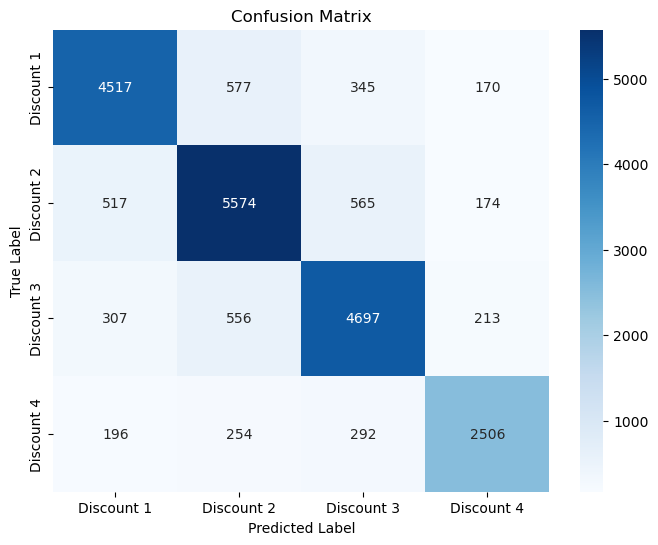

In [24]:
classes = [f"Discount {i}" for i in range(1, len(conf_matrix) + 1)]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

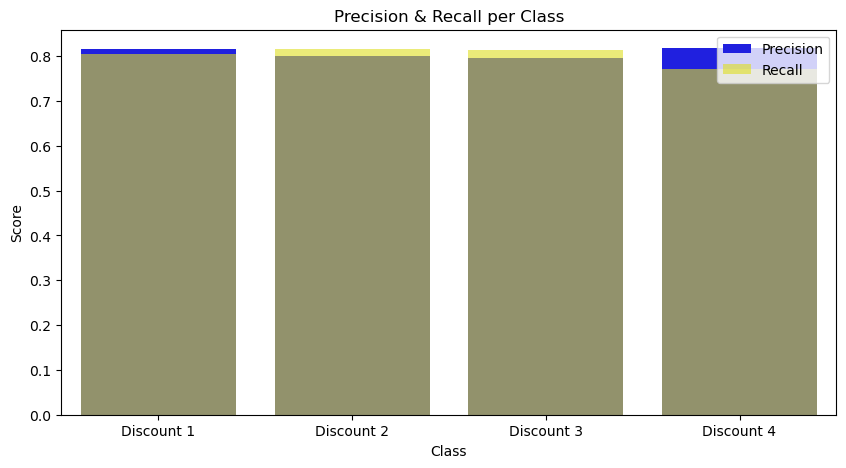

In [25]:
df_metrics = pd.DataFrame({"Class": classes, "Precision": precision, "Recall": recall})

plt.figure(figsize=(10, 5))
sns.barplot(x="Class", y="Precision", data=df_metrics, color="blue", label="Precision")
sns.barplot(x="Class", y="Recall", data=df_metrics, color="yellow", alpha=0.6, label="Recall")
plt.ylabel("Score")
plt.title("Precision & Recall per Class")
plt.legend()
plt.show()

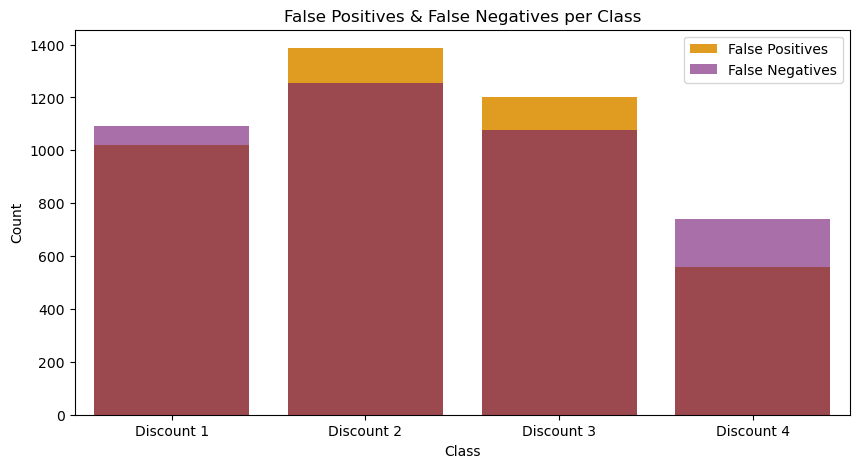

In [26]:
df_fp_fn = pd.DataFrame({"Class": classes, "False Positives": fp, "False Negatives": fn})

plt.figure(figsize=(10, 5))
sns.barplot(x="Class", y="False Positives", data=df_fp_fn, color="orange", label="False Positives")
sns.barplot(x="Class", y="False Negatives", data=df_fp_fn, color="purple", alpha=0.6, label="False Negatives")
plt.ylabel("Count")
plt.title("False Positives & False Negatives per Class")
plt.legend()
plt.show()

### **In Conclusion**
___

XGBoost achieved **80.6% accuracy** and an **AUC score of 0.9455**.  

- **Captures Feature Relationships** → Boosting allows it to learn complex interactions, such as between `Checkin Date` and `WeekDay`.  
- **Handles Class Imbalance** → Adjusts weights for misclassified samples, improving predictions for underrepresented classes.  
- **Regularization Prevents Overfitting** → Built-in L1/L2 regularization ensures robust generalization.  
- **Sequential Learning** → Unlike standard tree models, each new tree corrects errors, leading to better accuracy.  

